 # Analiza ponudbe rabljenih avtomobilov
 Za projektno nalogo sem s strani [avto.net](https://www.avto.net/) (dne 3.11.2018 ob 15.50 uri) zbral podatke o 1000 limuzinah.
 ## Zajeti podatki
 * id,
 * znamka,
 * model,
 * letnik 1. registracije,
 * število prevoženih kilometrov,
 * tip motorja (bencinski al diesel motor),
 * delovna prostornina v ccm,
 * moč motorja v kW,
 * tip menjalnika,
 * cena.

## Analiza
Preden se lotimo delovnih vprašanj si najprej za lažjo predstavo oglejmo glavno tabelo:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 6]
pd.options.display.max_rows = 20

In [25]:
avtomobili = pd.read_csv('obdelani-podatki/avtomobili.csv', index_col = 'id')
avtomobili.columns = ['Znamka', 'Model', 'Letnik 1. registracije', 'Tip motorja', 'Št. prevoženih kilometrov', 'Delovna prostornina v ccm', 'Št. kW', 'Tip menjalnika', 'Cena']
avtomobili

,Znamka,Model,Letnik 1. registracije,Tip motorja,Št. prevoženih kilometrov,Delovna prostornina v ccm,Št. kW,Tip menjalnika,Cena
id,,,,,,,,,
13596540,Citroen,Xsara 1.4i,1998,bencinski motor,162000.0,1360.0,55,roèni menjalnik (5 pr.),150
13596604,Saab,9-3 Linear 2.2 TiD,2004,diesel motor,240000.0,2171.0,92,roèni menjalnik (5 pr.),500
13596607,BMW,serija 7: 730d Avt. SPORT 245ks XENO...,2009,diesel motor,343300.0,2993.0,180,avtomatski menjalnik,18999
13596613,Mercedes-Benz,190 D,1986,diesel motor,230000.0,1997.0,53,roèni menjalnik (4 pr.),3500
13596706,Honda,Civic Sedan 1.6 VTi VTEC,1996,bencinski motor,240000.0,1595.0,118,roèni menjalnik (5 pr.),3300
13596865,Alfa Romeo,159 1.9 JTDM,2007,diesel motor,112500.0,1910.0,88,roèni menjalnik (6 pr.),6300
13596921,Jaguar,S-Type 3.0 V6,2000,bencinski motor,30000.0,NaN,175,roèni menjalnik (5 pr.),1000
13596993,Nissan,Primera 1.6 SLX,1999,bencinski motor,203000.0,1597.0,73,roèni menjalnik (5 pr.),690
13597059,Audi,RS4 4.2 quattro,2008,bencinski motor,120190.0,4163.0,309,roèni menjalnik (6 pr.),29990


Za ogrevanje si lahko ogledamo nekaj lastnosti povprečnega avtomobila iz oglasov: koliko je star, koliko kilometrov ima že za sabo, kolikšno delovno prostornino ima, koliko kW in koliko stane:

In [26]:
avtomobili.mean()[['Letnik 1. registracije', 'Št. prevoženih kilometrov', 'Delovna prostornina v ccm', 'Št. kW', 'Cena']]

Letnik 1. registracije         2005.356000
Št. prevoženih kilometrov    207135.473140
Delovna prostornina v ccm      2044.096537
Št. kW                          105.691000
Cena                           7855.327000
dtype: float64

### Katere znamke so najbolj zastopane na tržišču?

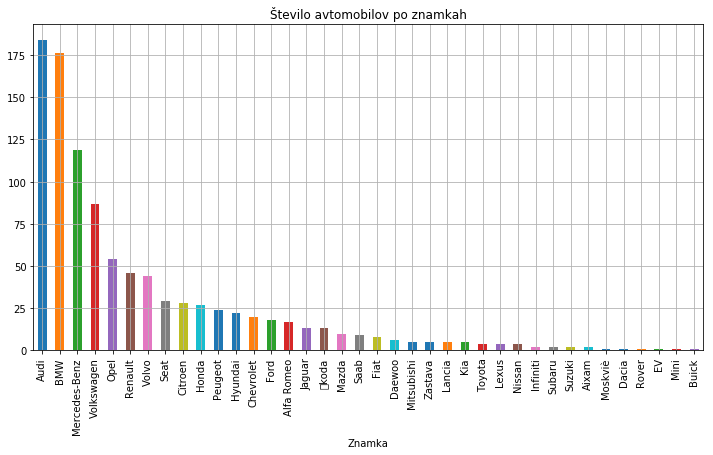

In [27]:
znamke = avtomobili.groupby('Znamka')
st_znamk = znamke.size().count()
graf_znamk = znamke.size().sort_values(ascending=False).head(st_znamk)
graf_znamk.name = 'znamke'
graf_znamk.sort_values(ascending=False).plot(kind = 'bar',
                                             title = 'Število avtomobilov po znamkah',
                                             grid = True)

Vidimo, da so najbolj zastopani nemški avtomobili. Prednjačijo Audi, BMW in Mercedes-Benz z več kot stotimi oglasi vsak. Dobro sta zastopana tudi Volkswagen in Opel. Najbolj zastopana francoska znamka Renault ne dosega številk znamke Opel, ki je najslabše zastopana nemška znamka. Oglasov francoskih avtomobilov in avtomobilov iz ostalih držav je torej občutno manj v primerjavi z oglasi nemških avtomobilov.

### Katere znamke so najdražje?
Oglejmo si, kako se povprečna cena avtomobila razlikuje od znamke do znamke:

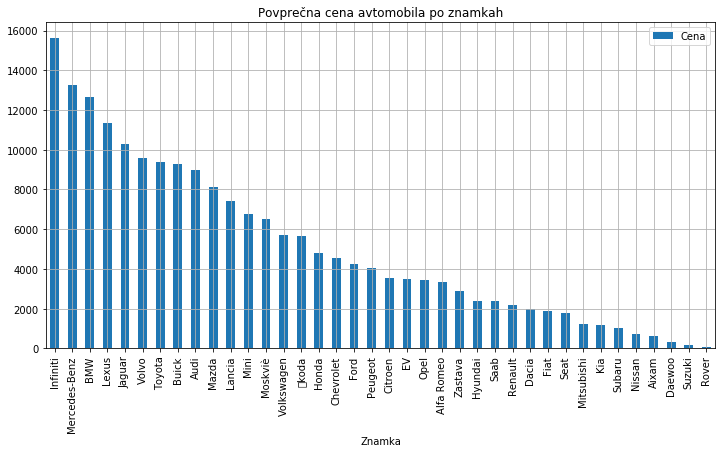

In [28]:
znamke_cena = znamke.mean()[['Cena']]
znamke_cena.sort_values(by = 'Cena', ascending=False).plot(kind = 'bar',
                                                           title = 'Povprečna cena avtomobila po znamkah',
                                                           grid = True)
#graf_znamk_cena = znamke_cena.size()
#graf_znamk_cena.name = 'znamke_cena'
#graf_znamk_cena.sort_values(ascending=False).plot(kind = 'bar', title = 'Povprečna cena avtomobila po znamkah')

Pričakovano se v vrhu nahajajo bolj luksuzne znamke, kot so Infiniti, Mercedes-Benz, BMW, Lexus, Jaguar itn.
### Povezava med letnikom in ceno
Ali je starejši avtomobil res nujno tudi cenejši? Oglejmo si povezavo med tema dvema kategorijama:

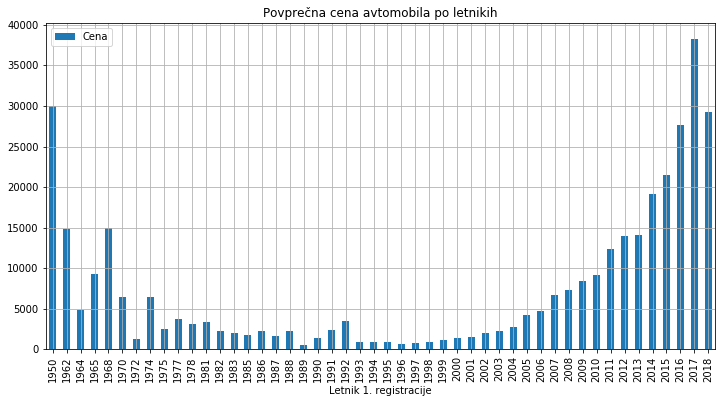

In [29]:
letniki = avtomobili.groupby('Letnik 1. registracije')
letniki_cena = letniki.mean()[['Cena']]
letniki_cena.sort_values(by = 'Letnik 1. registracije', ascending=True).plot(kind = 'bar',
                                                                             title = 'Povprečna cena avtomobila po letnikih',
                                                                             grid = True)
#avtomobili.plot(kind = 'scatter', x = 'Letnik 1. registracije', y = 'Cena')

Vidimo, da so načeloma starejši avtomobili res tudi cenejši, vendar zaradi fenomena starodobnikov začne cena s starejšim letnikom ponovno rasti, za zanimivost si lahko ogledamo avtomobile iz letnika 1950 in 1962:

In [30]:
avtomobili.loc[avtomobili['Letnik 1. registracije'] == 1950]

,Znamka,Model,Letnik 1. registracije,Tip motorja,Št. prevoženih kilometrov,Delovna prostornina v ccm,Št. kW,Tip menjalnika,Cena
id,,,,,,,,,
13617101,Mercedes-Benz,- 170 S,1950,bencinski motor,45000.0,1767.0,38,roèni menjalnik (4 pr.),29999


In [31]:
avtomobili.loc[avtomobili['Letnik 1. registracije'] == 1962]

,Znamka,Model,Letnik 1. registracije,Tip motorja,Št. prevoženih kilometrov,Delovna prostornina v ccm,Št. kW,Tip menjalnika,Cena
id,,,,,,,,,
13602981,Opel,- KAPITAN 2.6 6 valjni l.1962,1962,bencinski motor,86000.0,2600.0,66,roèni menjalnik,14860


Morda nekoliko preseneča dejstvo, da so avtomobili iz leta 2017  v povprečju dražji kot avtomobili iz leta 2018. Vzrok morda tiči v tem, da imamo več oglasov iz leta 2017 in imamo tako večjo možnost, da dobimo kakšen dražji avtomobil, ki dvigne povprečje. Poglejmo še število oglasov po letih:

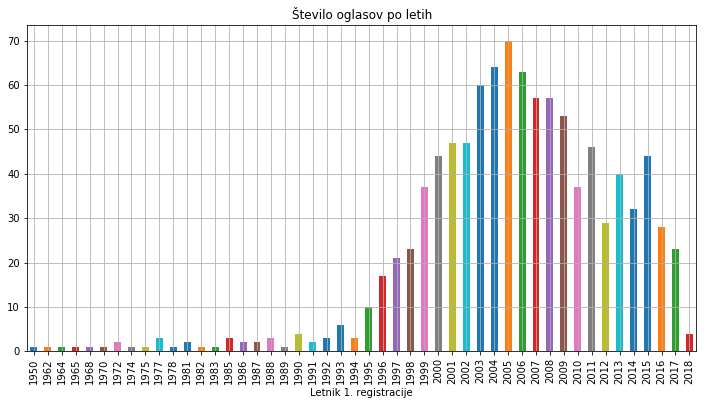

In [32]:
st_let = letniki.size().count()
graf_let = letniki.size().head(st_let)
graf_let.plot(kind = 'bar', title = 'Število oglasov po letih', grid = True)

Vidimo, da je res več oglasov iz leta 2017 kot iz leta 2018. Največ pa jih skoncentriranih okoli leta 2005.
### Povezava med številom prevoženih kilometrov in ceno
Poglejmo si, kako izgleda razsevni grafikon, kjer x-os predstavlja število prevoženih kilometrov, y-os pa ceno:

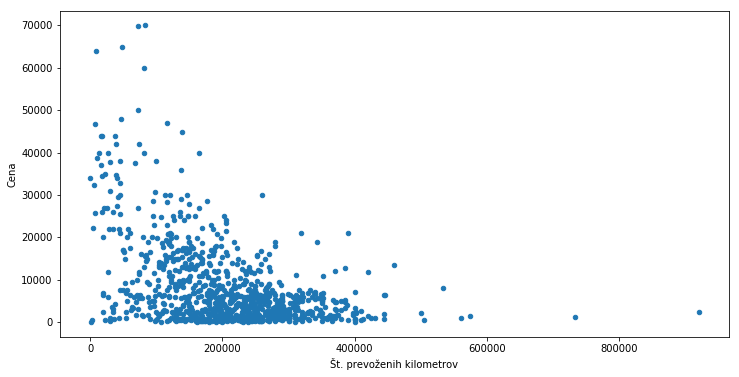

In [33]:
avtomobili.plot(kind = 'scatter', x = 'Št. prevoženih kilometrov', y = 'Cena')

Razvidno je, da manj kilometrov res pomeni višjo ceno, vendar so podatki kar raztreseni, torej odnos med tema dvema količinama ni ravno linearen. Za zanimivost lahko izračunamo korelacijski koeficient:

In [34]:
avtomobili['Št. prevoženih kilometrov'].corr(avtomobili['Cena'])

-0.450568576020092

Ta številka res nakazuje zgornjo tezo, vendar pa k ceni prispevajo še drugi faktorji, zato je korelacijski koeficient tudi po absolutni vrednosti relativno majhen.
### Povezava med velikostjo in močjo motorja v primerjavi s ceno
Podobno kot prej lahko primerjamo kako lahko velikost delovne prostornine motorja vpliva na ceno:

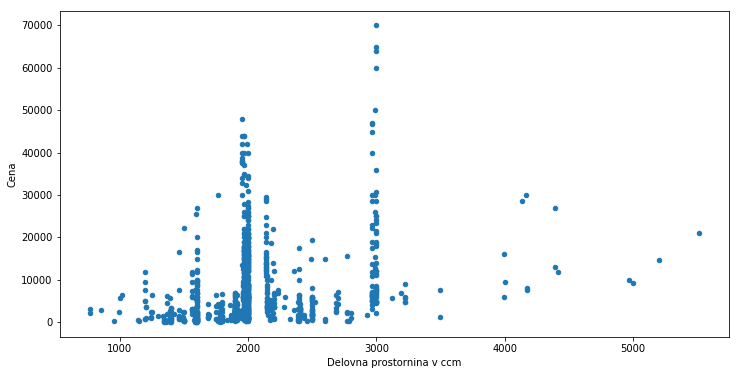

In [35]:
avtomobili.plot(kind = 'scatter', x = 'Delovna prostornina v ccm', y = 'Cena')

Ta graf ni ravno zgovoren, iz njega ne vidimo, ali so avtomobili z večjim motorjem res dražji. Veliko avtomobilov z manjšo delovno prostornino motorja je dražjih od avtomobilov z večjim motorjem. Kakšen je korelacijski koeficient?

In [36]:
avtomobili['Delovna prostornina v ccm'].corr(avtomobili['Cena'])

0.28636167145131075

Koeficient je relativno blizu ničli, torej iz teh podatkov ne moremo zaključiti nič pametnega. Primerjajmo ceno še s močjo motorja:

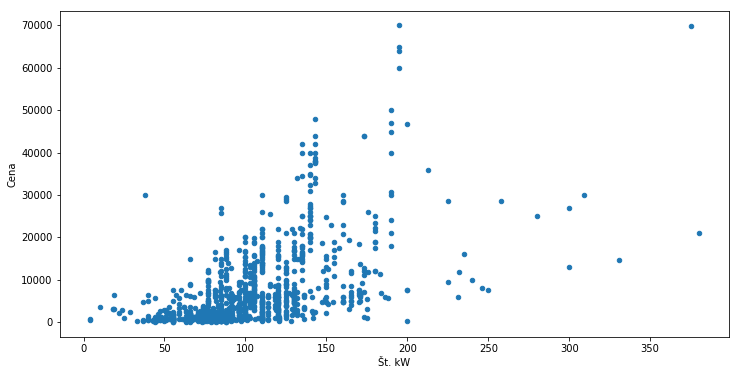

In [37]:
avtomobili.plot(kind = 'scatter', x = 'Št. kW', y = 'Cena')

Vidi se, da ponavadi več kilovatov res pomeni tudi višjo ceno. Ali je korelacijski koeficient po absolutni vrednosti večji kot v primeru števila prevoženih kilometrov?

In [38]:
avtomobili['Št. kW'].corr(avtomobili['Cena'])

0.5491548661959128

Iz teh številk bi lahko izpeljali, da moč motorja bolj vpliva na ceno kot število kilometrov.
### Tip motorja
Kolikšen je delež bencinskih motorjev v primerjavi z diesel motorji?

In [39]:
tip_motorja = avtomobili.groupby('Tip motorja')
tip_motorja.size().sort_values()

Tip motorja
elektro pogon               1
hibridni pogon              2
bencinski motor + plin      9
bencinski motor           331
diesel motor              657
dtype: int64

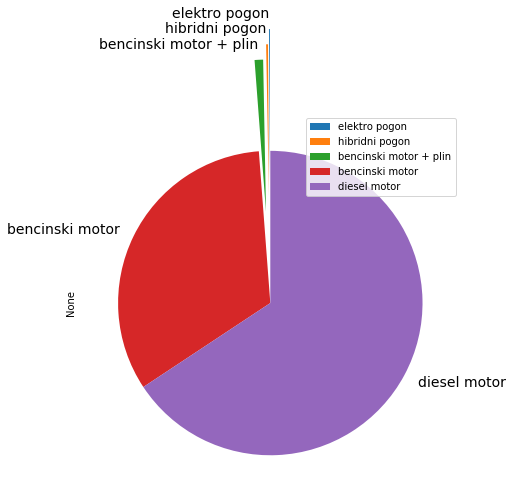

In [40]:
explode = (0.8, 0.7, 0.6, 0, 0)
tip_motorja.size().sort_values().plot(kind = 'pie', 
                                      legend = True, 
                                      figsize = (7, 7), 
                                      fontsize = 14,
                                      startangle = 90,
                                      explode = explode)

Slabi dve tretjini vseh  avtomobilov ima torej diesel motor, skoraj tretjino je bencinskih, ostalih je zelo malo (za 1.2%). Poglejmo, kako so se ti deleži spreminjali po letih:

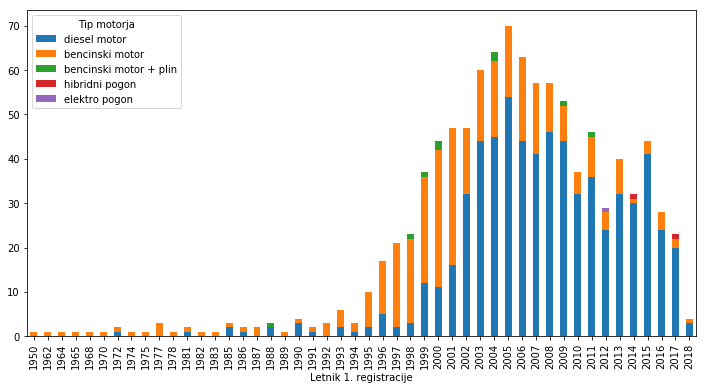

In [41]:
dt1 = avtomobili.groupby(['Letnik 1. registracije', 'Tip motorja'])['Letnik 1. registracije'].count().unstack('Tip motorja').fillna(0)
dt1[['diesel motor', 'bencinski motor', 'bencinski motor + plin', 'hibridni pogon', 'elektro pogon']].plot(kind = 'bar',
                                                                                                          stacked = 'True')

Glede na ta vzorec se je delež avtomobilov z diesel motorjem začel večati nekje okrog leta 1999 in je v zadnjih letih povsem dominanten v primerjavi z ostalimi. Pred letom 1999 so bili prevladujoči avtomobili z bencinskim motorjem.
### Tip menjalnika
Podobno analizo lahko naredimo še s tipom menjalnika avtomobila. Oglejmo si deleže:

In [42]:
tip_menjalnika = avtomobili.groupby('Tip menjalnika')
tip_menjalnika.size().sort_values()

Tip menjalnika
polavtomatski menjalnik               1
roèni menjalnik                       1
roèni menjalnik (4 pr.)              19
avtomatski menjalnik / tiptronic    102
avtomatski menjalnik                144
roèni menjalnik (6 pr.)             321
roèni menjalnik (5 pr.)             412
dtype: int64

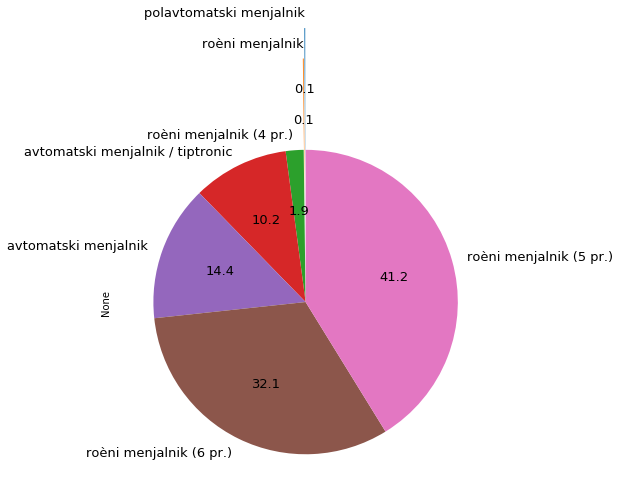

In [43]:
explode = (0.8, 0.6, 0, 0, 0, 0, 0)
tip_menjalnika.size().sort_values().plot(kind = 'pie', 
                                         legend = False, 
                                         figsize = (7, 7), 
                                         fontsize = 13,
                                         startangle = 90,
                                         explode = explode,
                                         autopct = '%.1f')

Slaba četrtina avtomobilov ima torej avtomatski menjalnik, ostali pa imajo ročni menjalnik. Poglejmo, kako se je to razmerje spreminjalo skozi leta. Za lažjo obravnavo združimo vse ročne menjalnike v eno kategorijo in avtomatske menjalnike v drugo kategorijo.

In [44]:
replacements = {
    'Tip menjalnika': {
        r'(polavtomatski menjalnik)': 'Polavtomatski menjalnik',
        r'(^avtomatski.*)': 'Avtomatski menjalnik',
        r'(roèni.*)': 'Ročni menjalnik'
    }
}
avtomobili.replace(replacements, regex = True, inplace = True)

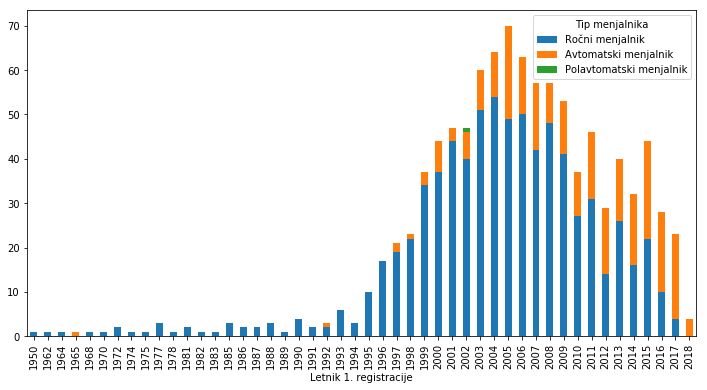

In [45]:
dt2 = avtomobili.groupby(['Letnik 1. registracije', 'Tip menjalnika'])['Letnik 1. registracije'].count().unstack('Tip menjalnika').fillna(0)
dt2[['Ročni menjalnik', 'Avtomatski menjalnik', 'Polavtomatski menjalnik']].plot(kind = 'bar',
                                                                                 stacked = 'True')

Tako lahko vidimo, da se je glede na ta vzorec delež avtomobilov z avtomatskim menjalnikom začel povečevati nekje po letu 2001 in v zadnjih letih postaja vse bolj priljubljen tip menjalnika, od leta 2016 ima že večina avtomobilov avtomatski menjalnik.
### Ocenjevanje cene
Ceno avtomobila lahko poizkusimo grobo oceniti z imenom znamke in letnikom 1. registracije avtomobila. Postopamo lahko takole: najprej določimo velikost cenovnega razreda `vcr` in število cenovnih razredov $n.$ Nato lahko za vsak $i=1, \dots , n$ izračunamo verjetnost $$P(C_i|Z \cap L),$$ kjer je $C_i$ dogodek, da se avto nahaja znotraj $i-$tega cenovnega razreda, dogodek $Z$ predstavlja znamko, $L$ pa letnik. Ker znamko in letnik avtomobila poznamo, lahko po definiciji pogojne verjetnosti izračunamo: $$P(C_i|Z \cap L) = \frac{P(C_i \cap Z \cap L)}{P(Z \cap L)}.$$ Izraz v števcu preprosto izračunamo tako, da preštejemo vse avtomobile v tem cenovnem razredu z ustreznim letnikom in znamko in to delimo s 1000 (številom vseh avtomobilov). Izraz v imenovalcu je še preprostejši, preštejemo vse avtomobile z ustreznim letnikom in znamko in delimo s 1000. Spodnja koda izračuna verjetnosti nahajanja avtomobila v vsakem cenovnem razredu:

In [52]:
maks_cena = avtomobili['Cena'].max()
def oceni(znamka, letnik, vcr=5000):
    n = maks_cena//vcr + 1
    razredi = [i*vcr for i in range(0, n + 1)]
    p_zlc = [0 for i in range(0, n + 1)]
    p_zl = avtomobili[(avtomobili.Znamka == znamka) & (avtomobili['Letnik 1. registracije'] == letnik)]['Znamka'].count()/1000
    cena = []
    verjetnost = []
    for i in range(0, n):
        b = avtomobili[(avtomobili.Cena >= razredi[i]) &
                       (avtomobili.Cena < razredi[i+1]) &
                       (avtomobili.Znamka == znamka) &
                       (avtomobili['Letnik 1. registracije'] == letnik)]['Znamka'].count()
        p_zlc[i] = b/1000
        cena.append(str(razredi[i])+'-'+str(razredi[i+1])+' €')
        verjetnost.append(p_zlc[i]/p_zl)
    data = pd.DataFrame(data=[cena,verjetnost]).transpose()
    data.columns = ['Cena', 'Verjetnost']
    return data.sort_values(by = 'Verjetnost', ascending=False)
oceni('BMW', 2015)

,Cena,Verjetnost
4,20000-25000 €,0.461538
3,15000-20000 €,0.230769
5,25000-30000 €,0.230769
2,10000-15000 €,0.0769231
0,0-5000 €,0
1,5000-10000 €,0
6,30000-35000 €,0
7,35000-40000 €,0
8,40000-45000 €,0
9,45000-50000 €,0


In [53]:
oceni('BMW', 2015, 3000)

,Cena,Verjetnost
6,18000-21000 €,0.307692
8,24000-27000 €,0.230769
7,21000-24000 €,0.153846
9,27000-30000 €,0.153846
4,12000-15000 €,0.0769231
5,15000-18000 €,0.0769231
0,0-3000 €,0
15,45000-48000 €,0
22,66000-69000 €,0
21,63000-66000 €,0


In [55]:
oceni('BMW', 2015, 1000)

,Cena,Verjetnost
20,20000-21000 €,0.153846
19,19000-20000 €,0.153846
24,24000-25000 €,0.153846
22,22000-23000 €,0.0769231
17,17000-18000 €,0.0769231
25,25000-26000 €,0.0769231
27,27000-28000 €,0.0769231
13,13000-14000 €,0.0769231
28,28000-29000 €,0.0769231
23,23000-24000 €,0.0769231


Vidimo, da se nam verjetnost "razprši" na več cenovnih razredov, čim zmanjšamo velikost cenovnih razredov. Seveda nam samo znamka in letnik ne povesta kaj dosti, za boljšo natančnost ocene bi potrebovali še kakšen podatek, na primer število kW ali pa število prevoženih kilometrov.